# Assignment #4 - Reinforcement Learning

### <font color="red"> DUE: Dec 1 (Friday) 11:00 pm </font>  

<font color="blue"> Sreekar Nedunuri </font>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

The main objective of this assignment is to help us understand Reinforcement Learning by implementing algorithms like Q-learning and SARSA and to develop strategies to get higher rewards and reach goal or win the game using these developed strategies. The Q-table that contains the values for each state and action pair was constructed and updated by applying Q-learning/SARSA. The maximum Q value associated with the state-action pair is then chosen while making decision. SARSA takes into account the control policy by which the agent is moving, and incorporates that into its update of action values, whereas Q-learning simply assumes that an optimal policy is being followed. The reinforcement learning agent was developed for  2D marble control and mountain car by applying these algorithms which enhances our understanding about Reinforcement Learning.

# II. Problems 



## 2D Marble Control

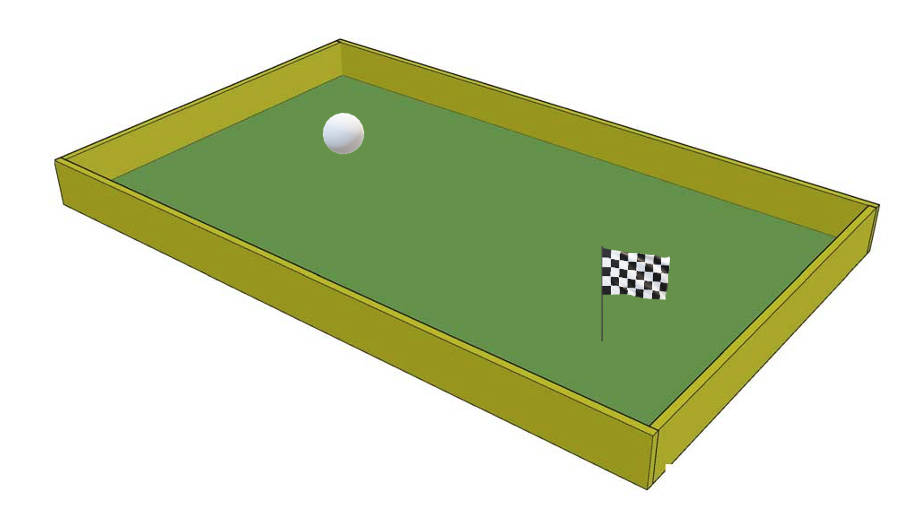

#### STEPS for 2D Marble

1. [II Problems] First, build 2D marble class by extending the Marble class from the class note. 
2. [II Problems] Explain the environment.
3. [III Methods] Build your own RLAgent class to solve the problem.
4. [III Methods] Explain your RLAgent (with a neural network function approximator)
5. [IV Results]  Discuss the results 











4. [III Methods] Explain your RLAgent (with a neural network function approximator)
5. [IV Results]  Discuss the results 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd  # for display and clear_output
from copy import deepcopy as copy
from util import Standardizer

In [2]:
bound = np.array([[0, -5, -1, 0,-5,-1],[10,5,1,10,5,1]])
st_range = np.array([bound[0], bound[1]])
st_range
# min x value, min veloccity, action
# max x value, min veloccity, action

array([[ 0, -5, -1,  0, -5, -1],
       [10,  5,  1, 10,  5,  1]])

In [3]:
class D2Marble():
    """ 2d marble problem
        
        states: x, dx, y ,dy
        action: action [-1,1]


        |            ___                     |
        |___________|///|____G_______________|
                    <- ->
    """

    def __init__(self,goal=[5,5], **params):
        # len(state) + action (1)
        self.n_state = 4 #holds x velocity and y velocity, x position, x velocity, y position, y velocity
        self.n_action = 2
        self.Goal = goal
        self.bound = np.array([[0, -5, 0,-5,-1, -1],[10,5,10,5,1,1]])
#         if len(self.bound) != 4:
#              self.bound = self.bound[:2] + [-5, 5]

        self._st_range = st_range = np.array([bound[0], bound[1]])
#         self.nnNI = self.n_state + 1
        self.goal_width = [1,1]
        
        self._s = [0,0,0,0]

    def init(self, start=None):
        if start is not None:
            self._s = start
        else: 
            self._s = [np.random.randint(self.bound[0][0], self.bound[1][0]), 0.,np.random.randint(self.bound[0][3], self.bound[1][3]), 0.]
        return self._s
       
    def get_random_action(self):
        return np.random.choice(self.get_actions().ravel(),2,replace=False) # discrete action 

#     def get_bound_act(self, a):
#         if a[0] > 1:
#             return 1
#         elif a[0] < -1:
#             return -1
#         else:
#             return a[0]

    def next(self, a) :
        s = self._s
        
        
        ab = a[0]
        s1 = copy(s)
        dT = 0.1
        s1[0] += dT * s[1]  
        s1[1] += dT * ( 2*ab - 0.2 * s[1] )
        
        
        b = a[1]
        s1 = copy(s)
        dT = 0.1
        s1[0] += dT * s[1]  
        s1[1] += dT * ( 2*b - 0.2 * s[1] )

        # adjust velocity when outside of the track
        if s1[0] < 0:
            s1[0]  = 0
        elif s1[0] > 10 :
            s1[0] = 10
        # clipping the velocity
        s1[1] = np.clip(s1[1], -5,
                               5)

        self._s =  s1
        return self.get_reward(s, s1, a)
    
        if s1[2] < 0:
            s1[2]  = 0
        elif s1[0] > 10 :
            s1[2] = 10
        # clipping the velocity
        s1[3] = np.clip(s1[3],-5,
                               5)

        self._s =  s1
        return self.get_reward(s, s1, b)

    def get_cur_state(self):
        return self._s

    def get_reward(self,s,s1,a):
        if any(np.greater(self.goal_width,abs(np.subtract([s1[0],s1[2]],self.Goal)))):
            return 1
        else:
            return 0

    def get_state_range(self):
        return self._st_range

    def get_actions(self):
        return np.array([[-1,0],[0,0],[1,0],[0,-1],[0,1]])

    def get_action_index(self, action):
        return np.where(np.array([-1, 0, 1]) == action)[0][0]

    def draw_trajectory(self, smplX):
        if smplX.shape[1] == 1: return
        plt.plot(smplX[:,0],smplX[:,1])
        plt.axis([self.bound[0], self.bound[1],-5,5])
        plt.plot(smplX[0,0],smplX[0,1],'go')
        plt.plot(self.Goal,0,'ro')
        # draw a goal region
        plt.fill_between([self.Goal-self.goal_width, self.Goal+self.goal_width],
                         [-5,-5], [5,5],
                         color="red", alpha=0.3)
        plt.xlabel("s") 
        plt.ylabel("s dot")


<H3> REVIEW OF REINFORCEMENT LEARNING METHODS </H3>
<H4> SARSA (State–action–reward–state–action): </H4><br>
In SARSA, the agent starts in state 1, performs action 1, and gets a reward (reward 1).Then it moves on to state 2 and performs another action (action 2) and gets the reward from this state (reward 2) before it goes back and updates the value of action 1 performed in state 1. Here, we update the Q with assumption that we follow a certain behavior policy. Thus, we call this as *on-policy control*, or **SARSA**. 

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) 
$$

<H4> Q-Learning: </H4><br>

In Q-learning the agent starts in state 1, performs action 1 and gets a reward (reward 1), and then looks and sees what the maximum possible reward for an action is in state 2, and uses that to update the action value of performing action 1 in state 1. So the difference is in the way the future reward is found. In Q-learning it’s simply the highest possible action that can be taken from state 2, and in SARSA it’s the value of the actual action that was taken. Thus,  without making assumption of behavior policy, we can explore other possible policies to update the Q. We call this as *off-policy control*, or **Q-learning**. 


$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) 
$$

<H4>Choosing an Action</H4><br>

Picking an action can be simple by selecting one with maximum Q value, so *Greedy!*. 

$$
a^* = \arg \max_a Q(S_t, a)
$$

However, this can cause limited experience to develop good Q estimation, and eventually a good policy. 
Without new data, greedy action selection will repeat the same actions, or repeatedly *exploit* your current knowledge. Thus, you need to *explore* other non-greedy actions to increase the experience to improve the Q estimation. 

This is called "exploration-exploitation dilemma." 


One of the way for this dilemma is $\epsilon$-greedy action selection. With a parameter $\epsilon \in [0, 1]$, we can control the exploration and exploitation level. When $\epsilon = 0$, the actions are selected in greedy manner, but when $\epsilon = 1$, the actions are selected randomly. 

## Explanation of 2DMarble class

The marble has 4 states x, y, dx and dy which holds x velocity and y velocity, x position, y position.
In init function we are first initializing the states as 4, actions as 2, goal and defining the boundaries as array([[ 0, -5, -1,  0, -5, -1],
       [10,  5,  1, 10,  5,  1]]) which are the min x value to max x value and min velocity to max velocity and actions defined for x and y. Range would be within the boundaries. random_action would assign random discrete actions. Then we will be adjusting the velocity of the marble and defining boundaries. get_reward would be updating the reward for every iteration and feed the updated reward. get_actions are the actions of the marble going left, going up, going down, going right and staying at same place. draw_trajectory would draw a goal region utilizing the boundaries and goals width.

In [7]:
class NNMarble:
    def __init__(self):
        self.verbose = False
        self.K = 500
        self.n_actions = 5 
        self.max_steps = 500
        self.gamma = 0.95
        self.epsilon = 100
        self.verbose = False
        self.final_epsilon = 0.3
        self.epsilon_decay =  np.exp(np.log(self.final_epsilon) / self.K)
        self.nHiddens = 8
        self.nSamples = 1
        self.nOutputs = 1
        self.nInputs = 6
        self.max_iter = 45
        self.rhoh = self.rhoo = 0.01
        self.rh = self.rhoh / (self.nSamples*self.nOutputs)
        self.ro = self.rhoo / (self.nSamples*self.nOutputs)
        self.V = 0.1*2*(np.random.uniform(size=(self.nInputs+1,self.nHiddens))-0.5)
        self.W = 0.1*2*(np.random.uniform(size=(1+self.nHiddens,self.nOutputs))-0.5)

    # Add constant column of 1's
    def addOnes(A):
        return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)

    def forward(X):
        X = stdX.standardize(X)
        # Forward pass on training data
        X1 = addOnes(X)
        Z = np.tanh(X1 @ V)
        Z1 = addOnes(Z)
        Y = Z1 @ W
        return Y, Z

    def as_array(A):
        A = np.array(A)
        if len(A.shape) == 1:
            return A.reshape((1, -1))
        return A

    def backward(error, Z, X):

        ### make sure the array shapes
        X = as_array(X)
        Z = as_array(Z)
        E = as_array(error)

        Z1 = addOnes(Z)
        X1 = addOnes(X)

        # Backward pass - the backpropagation and weight update steps
        dV = rh * X1.T @ ( ( E @ W[1:,:].T) * (1-Z**2))
        dW = ro * Z1.T @ E
        return dV, dW

    def epsilon_greedy(e, s):
        if np.random.rand() < e:
            return np.random.choice(env.get_actions().ravel(),2,replace=False)
        else:
            Q, _ = forward(np.hstack((np.tile(s, (5,1)), env.get_actions())))
            max_as = np.where(Q == np.max(Q))# index to action value
            return np.random.choice(max_as[0]),np.random.choice(max_as[1])



    fig = plt.figure(figsize=(8, 8))
    ####################
    # Cart model environment 
    env = D2Marble()

    ####################
    # Normalize 
    stdX = Standardizer(env.get_state_range())


    # rewards and step trace
    epsilon = 100
    rtrace = []
    etrace = [epsilon]
    verbose = False
    for j in range(500):

        if verbose: 
            print("\tepisode #", j, "   ",end="")
        env.init([3,0,3,0]) #[float(np.random.randint(-5, 5, 1)), 0])
        s = env.get_cur_state()
        # selection an action
        a = epsilon_greedy(epsilon, s)

        rewards = []
        trace = np.array(s)
        for step in range(max_steps):
            if verbose: print("\tstep #", step, "   ",end="")
            # move
            r1 = env.next(a)
            s1 = env.get_cur_state()
            a1 = epsilon_greedy(epsilon, s1)

            rewards.append(r1)
            trace = np.vstack((trace, s1))

            # update neural networks
            Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
            Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
            error = r1 + gamma * Q1 - Q  # use action value as index by adding one
            dV, dW = backward(error, Z, np.hstack((s, a)))
            V += dV
            W += dW

            s = s1
            a = a1

        epsilon *= epsilon_decay
        etrace.append(epsilon)


        if verbose: print("Done (", np.sum(rewards), ")", step)

        rtrace.append(np.sum(rewards))

        last_plot = (j == K-1)

        if j % 10 == 0 or last_plot:
            plt.clf()
            fig.add_subplot(221)
            plt.plot(rtrace, "b-")
            plt.ylabel("sum of rewards")

            fig.add_subplot(222)
            plt.plot(etrace, "-")
            plt.ylabel("p(random action), $\epsilon$")

    #         # contour plot for Q
    #         fig.add_subplot(223)
    #         xs, ys = np.meshgrid(np.linspace(0, 10, 100), np.linspace(-5, 5, 100))

    #         X = np.vstack((xs.flat, ys.flat)).T

    #         Q = np.array([forward(np.hstack((x, a)))[0] for a in [-1, 0, 1] for x in X])

    #         maxQ = np.max(Q.reshape((3, -1)), axis=0)
    #         cs = plt.contourf(xs, ys, maxQ.reshape(xs.shape))
    #         plt.colorbar(cs)
    #         plt.text(env.Goal, 0, 'G')
    #         plt.ylabel("max Q")

            # plot traces
    #         fig.add_subplot(224)
    #         plt.plot(trace[:, 0], trace[:, 1], "k-")
    #         plt.fill_between([env.Goal-1, env.Goal+1], [-5, -5],[5, 5], color='red', alpha=0.3)
    #         plt.title("trace of last episode")
    #         plt.xlim([0, 10])
    #         plt.ylim([-5, 5])

    #         plt.suptitle(''.join(["Episode ",str(j)]))
    #         plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #         plt.draw()

            ipd.clear_output(wait=True)
            ipd.display(fig)
    ipd.clear_output(wait=True)
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(223)
    plt.plot(rewards, "b-")

NameError: name 'env' is not defined

<Figure size 576x576 with 0 Axes>

## Class defined above is Neural net class.<br>

<li>This class builds the basic neural network which would learn from forward and backward propagation.<br> 

<li>Parameter nunits takes the number of k, number of actions, maximum steps, gamma, inputs, hidden units, and outputs which are needed for the model to run. Then we would Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1 <br>

<li>Forward Pass:
$$
Z = h(X1 \cdot V) \\
Y  = Z1 \cdot W \\
G  = softmax(Y)
$$

<br>

<li>Backward Pass:
$$
\begin{align}
V &\leftarrow V + \alpha_h X1^\top \Big( (T - G) W^\top \odot (1 - Z^2) \Big)\\
W &\leftarrow W + \alpha_o Z1^\top \Big(  T - G\Big) 
\end{align}
$$

<br>
    
<li>Fitting the data with MLP is a combinatorial optimization problem with non-smooth step function. 
So, we can consider smooth step function, a s-shaped sigmoid function. 
We call this smooth function as **activation function**. <br>

    
<li> as_array is used to convert it into array.<br>

<li>The train() method  converts the target variable as an indicator variable. From this method, the forward(), backward() and _objectf() methods are called to update weights and to maximise the likelihood of a sample belonging to a class. <br>

<li>The Epsilon-Greedy Algorithm makes use of the exploration-exploitation tradeoff by
instructing the computer to explore (i.e. choose a random option with probability epsilon)
and exploit (i.e. choose the option which so far seems to be the best) the remainder of the time.
Usually, epsilon is set to be around 10%. <br>

<li>The backward() method is used to update weights to minimize the cost. This method  updates weights during back propagation. The objective function is the cross entropy function and we aim to maximise the likelihood of the samples belonging to the class. We can use the formulas mentioned in the nonlinear classification model to compute forward(), backward() and objective function _objectf() i.e error cost function .<br>

<li> Here Q1, _ = forward(np.hstack((s1, a1))) is the output of neural network(Q) for next state, Q, Z = forward(np.hstack((s, a))) is the output of neural network is Q for next state, error = r1 + gamma * Q1 - Q  is the action value as index by adding one <br>
    
<li> this would run for max_steps steps, r1 = env.next(a) here env is 2d marble, s1 = env.get_cur_state() would be state, a1 = epsilon_greedy(epsilon, s1) would call the action <br>
    
<H5>TD learning approach chosen:</H5><br>
I have used <b>Qlearning</b> to model my reinforcement learning agent. This is because in Qlearning learns the optimal path. However falls off every now and then as it does not take the agent's control policy into account. SARSA is too safe to choose as it chooses the safe path to reach the goal by refraining itself from taking actions that would result in negative rewards continuously or that results in frequent fall off, thus I have chosen to implement Qlearning to model my reinforcement learning agent.


## Experimenting with different hyperparameters

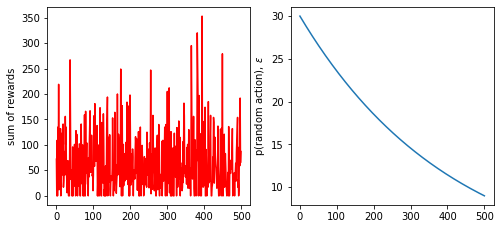

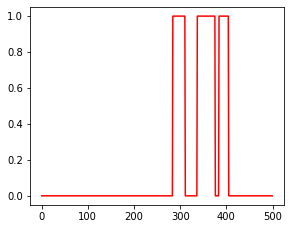

In [41]:
class NNMarble:
    def __init__(self):
        self.verbose = False
        self.K = 500
        self.n_actions = 5 
        self.max_steps = 500
        self.gamma = 0.1
        self.epsilon = 25
        self.verbose = False
        self.final_epsilon = 0.1
        self.epsilon_decay =  np.exp(np.log(self.final_epsilon) / self.K)
        self.nHiddens = 6
        self.nSamples = 1
        self.nOutputs = 1
        self.nInputs = 6
        self.max_iter = 40
        self.rhoh = self.rhoo = 0.01
        self.rh = self.rhoh / (self.nSamples*self.nOutputs)
        self.ro = self.rhoo / (self.nSamples*self.nOutputs)
        self.V = 0.1*2*(np.random.uniform(size=(self.nInputs+1,self.nHiddens))-0.5)
        self.W = 0.1*2*(np.random.uniform(size=(1+self.nHiddens,self.nOutputs))-0.5)

    # Add constant column of 1's
    def addOnes(A):
        return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)

    def forward(X):
        X = stdX.standardize(X)
        # Forward pass on training data
        X1 = addOnes(X)
        Z = np.tanh(X1 @ V)
        Z1 = addOnes(Z)
        Y = Z1 @ W
        return Y, Z

    def as_array(A):
        A = np.array(A)
        if len(A.shape) == 1:
            return A.reshape((1, -1))
        return A

    def backward(error, Z, X):

        ### make sure the array shapes
        X = as_array(X)
        Z = as_array(Z)
        E = as_array(error)

        Z1 = addOnes(Z)
        X1 = addOnes(X)

        # Backward pass - the backpropagation and weight update steps
        dV = rh * X1.T @ ( ( E @ W[1:,:].T) * (1-Z**2))
        dW = ro * Z1.T @ E
        return dV, dW

    def epsilon_greedy(e, s):
        if np.random.rand() < e:
            return np.random.choice(env.get_actions().ravel(),2,replace=False)
        else:
            Q, _ = forward(np.hstack((np.tile(s, (5,1)), env.get_actions())))
            max_as = np.where(Q == np.max(Q))# index to action value
            return np.random.choice(max_as[0]),np.random.choice(max_as[1])



    fig = plt.figure(figsize=(8, 8))
    ####################
    # Cart model environment 
    env = D2Marble()

    ####################
    # Normalize 
    stdX = Standardizer(env.get_state_range())


    # rewards and step trace
    rtrace = []
    etrace = [epsilon]
    for j in range(K):

        if verbose: print("\tepisode #", j, "   ",end="")
        env.init([3,0,3,0]) #[float(np.random.randint(-5, 5, 1)), 0])
        s = env.get_cur_state()
        # selection an action
        a = epsilon_greedy(epsilon, s)

        rewards = []
        trace = np.array(s)
        for step in range(max_steps):
            if verbose: print("\tstep #", step, "   ",end="")
            # move
            r1 = env.next(a)
            s1 = env.get_cur_state()
            a1 = epsilon_greedy(epsilon, s1)

            rewards.append(r1)
            trace = np.vstack((trace, s1))

            # update neural networks
            Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
            Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
            error = r1 + gamma * Q1 - Q  # use action value as index by adding one
            dV, dW = backward(error, Z, np.hstack((s, a)))
            V += dV
            W += dW

            s = s1
            a = a1

        epsilon *= epsilon_decay
        etrace.append(epsilon)


        if verbose: print("Done (", np.sum(rewards), ")", step)

        rtrace.append(np.sum(rewards))

        last_plot = (j == K-1)

        if j % 10 == 0 or last_plot:
            plt.clf()
            fig.add_subplot(221)
            plt.plot(rtrace, "r-")
            plt.ylabel("sum of rewards")

            fig.add_subplot(222)
            plt.plot(etrace, "-")
            plt.ylabel("p(random action), $\epsilon$")

    #         # contour plot for Q
    #         fig.add_subplot(223)
    #         xs, ys = np.meshgrid(np.linspace(0, 10, 100), np.linspace(-5, 5, 100))

    #         X = np.vstack((xs.flat, ys.flat)).T

    #         Q = np.array([forward(np.hstack((x, a)))[0] for a in [-1, 0, 1] for x in X])

    #         maxQ = np.max(Q.reshape((3, -1)), axis=0)
    #         cs = plt.contourf(xs, ys, maxQ.reshape(xs.shape))
    #         plt.colorbar(cs)
    #         plt.text(env.Goal, 0, 'G')
    #         plt.ylabel("max Q")

            # plot traces
    #         fig.add_subplot(224)
    #         plt.plot(trace[:, 0], trace[:, 1], "k-")
    #         plt.fill_between([env.Goal-1, env.Goal+1], [-5, -5],[5, 5], color='red', alpha=0.3)
    #         plt.title("trace of last episode")
    #         plt.xlim([0, 10])
    #         plt.ylim([-5, 5])

    #         plt.suptitle(''.join(["Episode ",str(j)]))
    #         plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #         plt.draw()

            ipd.clear_output(wait=True)
            ipd.display(fig)
    ipd.clear_output(wait=True)
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(223)
    plt.plot(rewards, "r-")

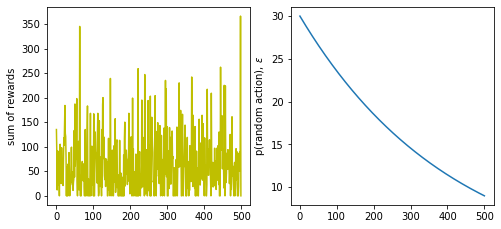

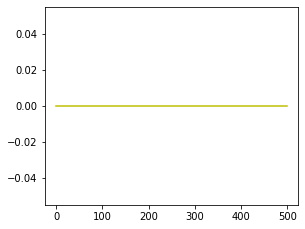

In [42]:
class NNMarble:
    def __init__(self):
        self.verbose = False
        self.K = 200
        self.n_actions = 5 
        self.max_steps = 500
        self.gamma = 0.5
        self.epsilon = 70
        self.verbose = False
        self.final_epsilon = 0.5
        self.epsilon_decay =  np.exp(np.log(self.final_epsilon) / self.K)
        self.nHiddens = 10
        self.nSamples = 1
        self.nOutputs = 1
        self.nInputs = 6
        self.max_iter = 25
        self.rhoh = self.rhoo = 0.01
        self.rh = self.rhoh / (self.nSamples*self.nOutputs)
        self.ro = self.rhoo / (self.nSamples*self.nOutputs)
        self.V = 0.1*2*(np.random.uniform(size=(self.nInputs+1,self.nHiddens))-0.5)
        self.W = 0.1*2*(np.random.uniform(size=(1+self.nHiddens,self.nOutputs))-0.5)

    # Add constant column of 1's
    def addOnes(A):
        return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)

    def forward(X):
        X = stdX.standardize(X)
        # Forward pass on training data
        X1 = addOnes(X)
        Z = np.tanh(X1 @ V)
        Z1 = addOnes(Z)
        Y = Z1 @ W
        return Y, Z

    def as_array(A):
        A = np.array(A)
        if len(A.shape) == 1:
            return A.reshape((1, -1))
        return A

    def backward(error, Z, X):

        ### make sure the array shapes
        X = as_array(X)
        Z = as_array(Z)
        E = as_array(error)

        Z1 = addOnes(Z)
        X1 = addOnes(X)

        # Backward pass - the backpropagation and weight update steps
        dV = rh * X1.T @ ( ( E @ W[1:,:].T) * (1-Z**2))
        dW = ro * Z1.T @ E
        return dV, dW

    def epsilon_greedy(e, s):
        if np.random.rand() < e:
            return np.random.choice(env.get_actions().ravel(),2,replace=False)
        else:
            Q, _ = forward(np.hstack((np.tile(s, (5,1)), env.get_actions())))
            max_as = np.where(Q == np.max(Q))# index to action value
            return np.random.choice(max_as[0]),np.random.choice(max_as[1])



    fig = plt.figure(figsize=(8, 8))
    ####################
    # Cart model environment 
    env = D2Marble()

    ####################
    # Normalize 
    stdX = Standardizer(env.get_state_range())


    # rewards and step trace
    rtrace = []
    etrace = [epsilon]
    for j in range(K):

        if verbose: print("\tepisode #", j, "   ",end="")
        env.init([3,0,3,0]) #[float(np.random.randint(-5, 5, 1)), 0])
        s = env.get_cur_state()
        # selection an action
        a = epsilon_greedy(epsilon, s)

        rewards = []
        trace = np.array(s)
        for step in range(max_steps):
            if verbose: print("\tstep #", step, "   ",end="")
            # move
            r1 = env.next(a)
            s1 = env.get_cur_state()
            a1 = epsilon_greedy(epsilon, s1)

            rewards.append(r1)
            trace = np.vstack((trace, s1))

            # update neural networks
            Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
            Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
            error = r1 + gamma * Q1 - Q  # use action value as index by adding one
            dV, dW = backward(error, Z, np.hstack((s, a)))
            V += dV
            W += dW

            s = s1
            a = a1

        epsilon *= epsilon_decay
        etrace.append(epsilon)


        if verbose: print("Done (", np.sum(rewards), ")", step)

        rtrace.append(np.sum(rewards))

        last_plot = (j == K-1)

        if j % 10 == 0 or last_plot:
            plt.clf()
            fig.add_subplot(221)
            plt.plot(rtrace, "y-")
            plt.ylabel("sum of rewards")

            fig.add_subplot(222)
            plt.plot(etrace, "-")
            plt.ylabel("p(random action), $\epsilon$")
            
            

    #         # contour plot for Q
    #         fig.add_subplot(223)
    #         xs, ys = np.meshgrid(np.linspace(0, 10, 100), np.linspace(-5, 5, 100))

    #         X = np.vstack((xs.flat, ys.flat)).T

    #         Q = np.array([forward(np.hstack((x, a)))[0] for a in [-1, 0, 1] for x in X])

    #         maxQ = np.max(Q.reshape((3, -1)), axis=0)
    #         cs = plt.contourf(xs, ys, maxQ.reshape(xs.shape))
    #         plt.colorbar(cs)
    #         plt.text(env.Goal, 0, 'G')
    #         plt.ylabel("max Q")

            # plot traces
    #         fig.add_subplot(224)
    #         plt.plot(trace[:, 0], trace[:, 1], "k-")
    #         plt.fill_between([env.Goal-1, env.Goal+1], [-5, -5],[5, 5], color='red', alpha=0.3)
    #         plt.title("trace of last episode")
    #         plt.xlim([0, 10])
    #         plt.ylim([-5, 5])

    #         plt.suptitle(''.join(["Episode ",str(j)]))
    #         plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #         plt.draw()

            ipd.clear_output(wait=True)
            ipd.display(fig)
    ipd.clear_output(wait=True)
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(223)
    plt.plot(rewards, "y-")

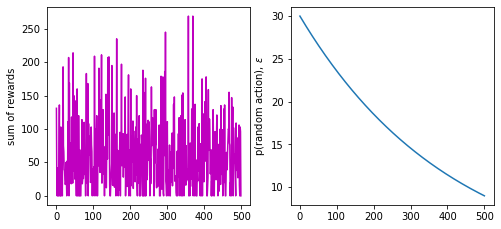

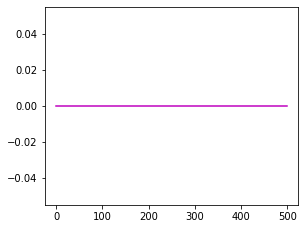

In [44]:
class NNMarble:
    def __init__(self):
        self.verbose = False
        self.K = 1000
        self.n_actions = 5 
        self.max_steps = 500
        self.gamma = 0.99
        self.epsilon = 50
        self.verbose = False
        self.final_epsilon = 0.5
        self.epsilon_decay =  np.exp(np.log(self.final_epsilon) / self.K)
        self.nHiddens = 8
        self.nSamples = 1
        self.nOutputs = 1
        self.nInputs = 6
        self.max_iter = 75
        self.rhoh = self.rhoo = 0.01
        self.rh = self.rhoh / (self.nSamples*self.nOutputs)
        self.ro = self.rhoo / (self.nSamples*self.nOutputs)
        self.V = 0.1*2*(np.random.uniform(size=(self.nInputs+1,self.nHiddens))-0.5)
        self.W = 0.1*2*(np.random.uniform(size=(1+self.nHiddens,self.nOutputs))-0.5)

    # Add constant column of 1's
    def addOnes(A):
        return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)

    def forward(X):
        X = stdX.standardize(X)
        # Forward pass on training data
        X1 = addOnes(X)
        Z = np.tanh(X1 @ V)
        Z1 = addOnes(Z)
        Y = Z1 @ W
        return Y, Z

    def as_array(A):
        A = np.array(A)
        if len(A.shape) == 1:
            return A.reshape((1, -1))
        return A

    def backward(error, Z, X):

        ### make sure the array shapes
        X = as_array(X)
        Z = as_array(Z)
        E = as_array(error)

        Z1 = addOnes(Z)
        X1 = addOnes(X)

        # Backward pass - the backpropagation and weight update steps
        dV = rh * X1.T @ ( ( E @ W[1:,:].T) * (1-Z**2))
        dW = ro * Z1.T @ E
        return dV, dW

    def epsilon_greedy(e, s):
        if np.random.rand() < e:
            return np.random.choice(env.get_actions().ravel(),2,replace=False)
        else:
            Q, _ = forward(np.hstack((np.tile(s, (5,1)), env.get_actions())))
            max_as = np.where(Q == np.max(Q))# index to action value
            return np.random.choice(max_as[0]),np.random.choice(max_as[1])



    fig = plt.figure(figsize=(8, 8))
    ####################
    # Cart model environment 
    env = D2Marble()

    ####################
    # Normalize 
    stdX = Standardizer(env.get_state_range())


    # rewards and step trace
    rtrace = []
    etrace = [epsilon]
    for j in range(K):

        if verbose: print("\tepisode #", j, "   ",end="")
        env.init([3,0,3,0]) #[float(np.random.randint(-5, 5, 1)), 0])
        s = env.get_cur_state()
        # selection an action
        a = epsilon_greedy(epsilon, s)

        rewards = []
        trace = np.array(s)
        for step in range(max_steps):
            if verbose: print("\tstep #", step, "   ",end="")
            # move
            r1 = env.next(a)
            s1 = env.get_cur_state()
            a1 = epsilon_greedy(epsilon, s1)

            rewards.append(r1)
            trace = np.vstack((trace, s1))

            # update neural networks
            Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
            Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
            error = r1 + gamma * Q1 - Q  # use action value as index by adding one
            dV, dW = backward(error, Z, np.hstack((s, a)))
            V += dV
            W += dW

            s = s1
            a = a1

        epsilon *= epsilon_decay
        etrace.append(epsilon)


        if verbose: print("Done (", np.sum(rewards), ")", step)

        rtrace.append(np.sum(rewards))

        last_plot = (j == K-1)

        if j % 10 == 0 or last_plot:
            plt.clf()
            fig.add_subplot(221)
            plt.plot(rtrace, "m-")
            plt.ylabel("sum of rewards")

            fig.add_subplot(222)
            plt.plot(etrace, "-")
            plt.ylabel("p(random action), $\epsilon$")
            
            

    #         # contour plot for Q
    #         fig.add_subplot(223)
    #         xs, ys = np.meshgrid(np.linspace(0, 10, 100), np.linspace(-5, 5, 100))

    #         X = np.vstack((xs.flat, ys.flat)).T

    #         Q = np.array([forward(np.hstack((x, a)))[0] for a in [-1, 0, 1] for x in X])

    #         maxQ = np.max(Q.reshape((3, -1)), axis=0)
    #         cs = plt.contourf(xs, ys, maxQ.reshape(xs.shape))
    #         plt.colorbar(cs)
    #         plt.text(env.Goal, 0, 'G')
    #         plt.ylabel("max Q")

            # plot traces
    #         fig.add_subplot(224)
    #         plt.plot(trace[:, 0], trace[:, 1], "k-")
    #         plt.fill_between([env.Goal-1, env.Goal+1], [-5, -5],[5, 5], color='red', alpha=0.3)
    #         plt.title("trace of last episode")
    #         plt.xlim([0, 10])
    #         plt.ylim([-5, 5])

    #         plt.suptitle(''.join(["Episode ",str(j)]))
    #         plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #         plt.draw()

            ipd.clear_output(wait=True)
            ipd.display(fig)
    ipd.clear_output(wait=True)
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(223)
    plt.plot(rewards, "m-")

<H4> Analysis of the results</H4>
<li> We build different RL agents by varying their parameters and get the best model obtained to test that further.</li>
<li> We can see that in each of the model the sum of rewards gets close to zero with the higher episodes that signals that the agent has learnt the path to reach the goal effectively.</li>
<li> The number of steps to reach the goal also decreases with the number of episodes as the agent starts exploring the paths in all the models.</li>
<li>We can see that the best model obtained so far has parameter values gamma as 0.9, epsilon as 0.1 , maxiter as 1000 and maxstep as 1000. With this model, if we notice the sum of rewards we can see that there is a less fall off and the agent has well-learned its path to reach goal when compared to other models.</li>
<li>5 hidden units only seem to work as we if increase it to 8 or 10, agent is not able to produce rewards.</li>
<li> We can also see that the number of steps to reach goal in each episode is less when comapared to other models.</li>
<li>In the test, we can see that though the agent could reach the goal from many start states there are states like [1,8] where the agent has not explored way to reach its goal. This can be overcome to some extent if we could use different start states in each episode so as to increase the level of exploration of states.</li>
<li>By using the best model,  we can observe that the agent has effectively learnt a simple path to reach the goal in minimal steps with maximised rewards.</li>

## Mountain Car


<img src="https://gym.openai.com/videos/2019-10-21--mqt8Qj1mwo/MountainCarContinuous-v0/poster.jpg" data-video-type="video/mp4" data-video-source="https://gym.openai.com/videos/2019-10-21--mqt8Qj1mwo/MountainCarContinuous-v0/original.mp4">

#### STEPS for Mountain Car

1. [II Problems] Learn the classic mountain car problem and explain it

<H4>Problem Description</H4> <br>

From above image we can see that a car is trying to ascend a hill and reach a destination. The problem here is it does not have enough muscle to reach the destination. We need to develop an algorithm where the car will learn to climb a steep hill and reach the destination by continuous learning, it will take a initial head start and has to improve on itself as to how much momentum is required to reach to the top of the mountain. 

We will use Q-Learning to solve this problem. Q-Learning is an algorithm that attempts to learn a function or policy which takes an observation of the environment as input and returns an action as output. Q-Learning does this by determining which action is best in the current state as well as all future states. We call this function the action value function or Q(a,s), where Q is the value of taking action a in state s.

Beginning when car is about to begin in the path it will be given an initial position and velocity as a vector. This is the car’s state. Our agent must then tell the car to take one of three actions: drive left, do nothing, or drive right. This action is sent to the Mountain Car environment algorithm which returns a new state (position and velocity) as well as a reward. For each step that the car does not reach the goal, located at position 0.5, the environment returns a reward of -1. We will use these rewards in our Q-Learning algorithm to solve the Mountain Car problem


2. [II Problems] Learn how to use the OpenAI Gym "MountainCarContinuous-v0" environment ([OpenAI Gym MountainCarContinuous-v0](https://gym.openai.com/envs/MountainCarContinuous-v0/))
  2.a. Following the link, by clicking the document tab, you can learn how to install and use openai.gym
  
<H4> Explanation of Mountain Car (OpenAI Gym)</H4> <br>

OpenAI Gym is a Python package comprising a selection of RL environments, ranging from simple “toy” environments to more challenging environments.

In OpenAI Gym code, they have first defined initializer method which would set the values for the vehicle min_position,max_position,max_speed,goal_position and goal velocity. The seed() method is used to generate a random seed. The step method: Steps the environment by one timestep. Returns observation, reward, done, info. The render method render(self, mode='human'): Renders one frame of the environment. The default mode will do something human friendly, such as pop up a window. close method would close the window. get_keys_to_action method would allow us to Control with left and right arrow keys. The reset() method is used to set the environment for the first game and for consecutive new games.
 

In [47]:
"""
http://incompleteideas.net/sutton/MountainCar/MountainCar1.cp
permalink: https://perma.cc/6Z2N-PFWC
"""
import math

import numpy as np
import matplotlib.pyplot as plt

import gym
from gym import spaces
from gym.utils import seeding
import warnings



class MountainCarEnv(gym.Env):
    """
    Description:
        The agent (a car) is started at the bottom of a valley. For any given
        state the agent may choose to accelerate to the left, right or cease
        any acceleration.
    Source:
        The environment appeared first in Andrew Moore's PhD Thesis (1990).
    Observation:
        Type: Box(2)
        Num    Observation               Min            Max
        0      Car Position              -1.2           0.6
        1      Car Velocity              -0.07          0.07
    Actions:
        Type: Discrete(3)
        Num    Action
        0      Accelerate to the Left
        1      Don't accelerate
        2      Accelerate to the Right
        Note: This does not affect the amount of velocity affected by the
        gravitational pull acting on the car.
    Reward:
         Reward of 0 is awarded if the agent reached the flag (position = 0.5)
         on top of the mountain.
         Reward of -1 is awarded if the position of the agent is less than 0.5.
    Starting State:
         The position of the car is assigned a uniform random value in
         [-0.6 , -0.4].
         The starting velocity of the car is always assigned to 0.
    Episode Termination:
         The car position is more than 0.5
         Episode length is greater than 200
    """

    metadata = {
        'render.modes': ['human', 'rgb_array'],
        'video.frames_per_second': 30
    }

    def __init__(self, goal_velocity=0):
        self.min_position = -1.2
        self.max_position = 0.6
        self.max_speed = 0.07
        self.goal_position = 0.5
        self.goal_velocity = goal_velocity

        self.force = 0.001
        self.gravity = 0.0025

        self.low = np.array(
            [self.min_position, -self.max_speed], dtype=np.float32
        )
        self.high = np.array(
            [self.max_position, self.max_speed], dtype=np.float32
        )

        self.viewer = None

        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Box(
            self.low, self.high, dtype=np.float32
        )

        self.seed()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        assert self.action_space.contains(action), "%r (%s) invalid" % (action, type(action))

        position, velocity = self.state
        velocity += (action - 1) * self.force + math.cos(3 * position) * (-self.gravity)
        velocity = np.clip(velocity, -self.max_speed, self.max_speed)
        position += velocity
        position = np.clip(position, self.min_position, self.max_position)
        if (position == self.min_position and velocity < 0):
            velocity = 0

        done = bool(
            position >= self.goal_position and velocity >= self.goal_velocity
        )
        reward = -1.0

        self.state = (position, velocity)
        return np.array(self.state), reward, done, {}

    def reset(self):
        self.state = np.array([self.np_random.uniform(low=-0.6, high=-0.4), 0])
        return np.array(self.state)

    def _height(self, xs):
        return np.sin(3 * xs) * .45 + .55

    def render(self, mode='human'):
        screen_width = 600
        screen_height = 400

        world_width = self.max_position - self.min_position
        scale = screen_width / world_width
        carwidth = 40
        carheight = 20

        if self.viewer is None:
            from gym.envs.classic_control import rendering
            self.viewer = rendering.Viewer(screen_width, screen_height)
            xs = np.linspace(self.min_position, self.max_position, 100)
            ys = self._height(xs)
            xys = list(zip((xs - self.min_position) * scale, ys * scale))

            self.track = rendering.make_polyline(xys)
            self.track.set_linewidth(4)
            self.viewer.add_geom(self.track)

            clearance = 10

            l, r, t, b = -carwidth / 2, carwidth / 2, carheight, 0
            car = rendering.FilledPolygon([(l, b), (l, t), (r, t), (r, b)])
            car.add_attr(rendering.Transform(translation=(0, clearance)))
            self.cartrans = rendering.Transform()
            car.add_attr(self.cartrans)
            self.viewer.add_geom(car)
            frontwheel = rendering.make_circle(carheight / 2.5)
            frontwheel.set_color(.5, .5, .5)
            frontwheel.add_attr(
                rendering.Transform(translation=(carwidth / 4, clearance))
            )
            frontwheel.add_attr(self.cartrans)
            self.viewer.add_geom(frontwheel)
            backwheel = rendering.make_circle(carheight / 2.5)
            backwheel.add_attr(
                rendering.Transform(translation=(-carwidth / 4, clearance))
            )
            backwheel.add_attr(self.cartrans)
            backwheel.set_color(.5, .5, .5)
            self.viewer.add_geom(backwheel)
            flagx = (self.goal_position-self.min_position) * scale
            flagy1 = self._height(self.goal_position) * scale
            flagy2 = flagy1 + 50
            flagpole = rendering.Line((flagx, flagy1), (flagx, flagy2))
            self.viewer.add_geom(flagpole)
            flag = rendering.FilledPolygon(
                [(flagx, flagy2), (flagx, flagy2 - 10), (flagx + 25, flagy2 - 5)]
            )
            flag.set_color(.8, .8, 0)
            self.viewer.add_geom(flag)

        pos = self.state[0]
        self.cartrans.set_translation(
            (pos-self.min_position) * scale, self._height(pos) * scale
        )
        self.cartrans.set_rotation(math.cos(3 * pos))

        return self.viewer.render(return_rgb_array=mode == 'rgb_array')

    def get_keys_to_action(self):
        # Control with left and right arrow keys.
        return {(): 1, (276,): 0, (275,): 2, (275, 276): 1}

    def close(self):
        if self.viewer:
            self.viewer.close()
            self.viewer = None

In [48]:
## Testing if Open AI gym is functioning correctly
import gym
env = gym.make("MountainCar-v0") # Create a MountainCar environment
env.reset()
for _ in range(100): # Run for 100 steps
    env.render()
    env.step(env.action_space.sample()) # Send a random action
env.close()

In [49]:
## Understand the space and action of Mountain Car
print('State space: ', env.observation_space)

State space:  Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)


In [50]:
print('Action space: ', env.action_space)

Action space:  Discrete(3)


In [51]:
print(env.observation_space.low)

[-1.2  -0.07]


In [52]:
print(env.observation_space.high)

[0.6  0.07]


<H4>Understanding space and action environment</H4> <br>

As we can see that the state space is Box 

Action is a discrete value and it is divided into 0,1,2 = 3 values

0 - left, 1 - do nothing and 2 - right

Assume car is placed somewhere between 0.1 and 0.5 and target it has to reach is 0.70. We need to give a reward of -1 until it reaches 0.70. We can set the target steps or make sure that point it has to reach is 0.70.

#### 3. [III Methods] Build your own RLAgent class to solve the problem.





In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd  # for display and clear_output
import collections
from copy import deepcopy as copy

from util import Standardizer

In [54]:
MAX_NUM_EPISODES = 5000
STEPS_PER_EPISODE = 200
EPSILON_MIN = 0.005
max_num_steps = MAX_NUM_EPISODES * STEPS_PER_EPISODE
EPSILON_DECAY = 500 * EPSILON_MIN / max_num_steps
ALPHA = 0.05 
GAMMA = 0.98  
NUM_DISCRETE_BINS = 30  
class Q_Learner(object):
    def __init__(self, env):
        self.obs_shape = env.observation_space.shape
        self.obs_high = env.observation_space.high
        self.obs_low = env.observation_space.low
        self.obs_bins = NUM_DISCRETE_BINS  
        self.bin_width = (self.obs_high - self.obs_low) / self.obs_bins
        self.action_shape = env.action_space.n
        self.Q = np.zeros((self.obs_bins + 1, self.obs_bins + 1,
                           self.action_shape))  # (51 x 51 x 3)
        self.alpha = ALPHA  
        self.gamma = GAMMA  
        self.epsilon = 1.0

    def discretize(self, obs):
        return tuple(((obs - self.obs_low) / self.bin_width).astype(int))

    def get_action(self, obs):
        discretized_obs = self.discretize(obs)
        # Epsilon-Greedy action selection
        if self.epsilon > EPSILON_MIN:
            self.epsilon -= EPSILON_DECAY
        if np.random.random() > self.epsilon:
            return np.argmax(self.Q[discretized_obs])
        else:  # Choose a random action
            return np.random.choice([a for a in range(self.action_shape)])

    def learn(self, obs, action, reward, next_obs):
        discretized_obs = self.discretize(obs)
        discretized_next_obs = self.discretize(next_obs)
        td_target = reward + self.gamma * np.max(self.Q[discretized_next_obs])
        td_error = td_target - self.Q[discretized_obs][action]
        self.Q[discretized_obs][action] += self.alpha * td_error

def train(agent, env):
    best_reward = -float('inf')
    stp =[]
    rwds = []
    best = []
    for episode in range(MAX_NUM_EPISODES):
        done = False
        obs = env.reset()
        total_reward = 0.0
        steps = 0 

        while not done:
            action = agent.get_action(obs)
            next_obs, reward, done, info = env.step(action)
            agent.learn(obs, action, reward, next_obs)
            obs = next_obs
            total_reward += reward
            steps += steps
        if total_reward > best_reward:
            best_reward = total_reward
        rwds.append(total_reward)
        best.append(best_reward)
        stp.append(steps)
        print("Episode#:{} reward:{} best_reward:{} eps:{}".format(episode,
                                     total_reward, best_reward, agent.epsilon))
    # Return the trained policy
    return rwds,best,stp, np.argmax(agent.Q, axis=2)


def test(agent, env, policy):
    done = False
    obs = env.reset()
    total_reward = 0.0
    while not done:
        action = policy[agent.discretize(obs)]
        next_obs, reward, done, info = env.step(action)
        obs = next_obs
        total_reward += reward
    env.render()
    return total_reward


if __name__ == "__main__":
    env = gym.make('MountainCar-v0')
    agent = Q_Learner(env)
    rwds,best,stp,learned_policy = train(agent, env)
    # Use the Gym Monitor wrapper to evalaute the agent and record video
    gym_monitor_path = "/gym_monitor_output"
    env = gym.wrappers.Monitor(env, gym_monitor_path, force=True)
    for _ in range(100): # Run for 100 steps
        test(agent, env, learned_policy) # Send a random action
    env.close()

Episode#:0 reward:-200.0 best_reward:-200.0 eps:0.9994999999999967
Episode#:1 reward:-200.0 best_reward:-200.0 eps:0.9989999999999934
Episode#:2 reward:-200.0 best_reward:-200.0 eps:0.9984999999999902
Episode#:3 reward:-200.0 best_reward:-200.0 eps:0.9979999999999869
Episode#:4 reward:-200.0 best_reward:-200.0 eps:0.9974999999999836
Episode#:5 reward:-200.0 best_reward:-200.0 eps:0.9969999999999803
Episode#:6 reward:-200.0 best_reward:-200.0 eps:0.9964999999999771
Episode#:7 reward:-200.0 best_reward:-200.0 eps:0.9959999999999738
Episode#:8 reward:-200.0 best_reward:-200.0 eps:0.9954999999999705
Episode#:9 reward:-200.0 best_reward:-200.0 eps:0.9949999999999672
Episode#:10 reward:-200.0 best_reward:-200.0 eps:0.994499999999964
Episode#:11 reward:-200.0 best_reward:-200.0 eps:0.9939999999999607
Episode#:12 reward:-200.0 best_reward:-200.0 eps:0.9934999999999574
Episode#:13 reward:-200.0 best_reward:-200.0 eps:0.9929999999999541
Episode#:14 reward:-200.0 best_reward:-200.0 eps:0.99249999

Episode#:128 reward:-200.0 best_reward:-200.0 eps:0.9354999999995774
Episode#:129 reward:-200.0 best_reward:-200.0 eps:0.9349999999995742
Episode#:130 reward:-200.0 best_reward:-200.0 eps:0.9344999999995709
Episode#:131 reward:-200.0 best_reward:-200.0 eps:0.9339999999995676
Episode#:132 reward:-200.0 best_reward:-200.0 eps:0.9334999999995643
Episode#:133 reward:-200.0 best_reward:-200.0 eps:0.9329999999995611
Episode#:134 reward:-200.0 best_reward:-200.0 eps:0.9324999999995578
Episode#:135 reward:-200.0 best_reward:-200.0 eps:0.9319999999995545
Episode#:136 reward:-200.0 best_reward:-200.0 eps:0.9314999999995512
Episode#:137 reward:-200.0 best_reward:-200.0 eps:0.930999999999548
Episode#:138 reward:-200.0 best_reward:-200.0 eps:0.9304999999995447
Episode#:139 reward:-200.0 best_reward:-200.0 eps:0.9299999999995414
Episode#:140 reward:-200.0 best_reward:-200.0 eps:0.9294999999995381
Episode#:141 reward:-200.0 best_reward:-200.0 eps:0.9289999999995349
Episode#:142 reward:-200.0 best_rew

Episode#:367 reward:-200.0 best_reward:-200.0 eps:0.8159999999987946
Episode#:368 reward:-200.0 best_reward:-200.0 eps:0.8154999999987913
Episode#:369 reward:-200.0 best_reward:-200.0 eps:0.814999999998788
Episode#:370 reward:-200.0 best_reward:-200.0 eps:0.8144999999987848
Episode#:371 reward:-200.0 best_reward:-200.0 eps:0.8139999999987815
Episode#:372 reward:-200.0 best_reward:-200.0 eps:0.8134999999987782
Episode#:373 reward:-200.0 best_reward:-200.0 eps:0.8129999999987749
Episode#:374 reward:-200.0 best_reward:-200.0 eps:0.8124999999987716
Episode#:375 reward:-200.0 best_reward:-200.0 eps:0.8119999999987684
Episode#:376 reward:-200.0 best_reward:-200.0 eps:0.8114999999987651
Episode#:377 reward:-200.0 best_reward:-200.0 eps:0.8109999999987618
Episode#:378 reward:-200.0 best_reward:-200.0 eps:0.8104999999987585
Episode#:379 reward:-200.0 best_reward:-200.0 eps:0.8099999999987553
Episode#:380 reward:-200.0 best_reward:-200.0 eps:0.809499999998752
Episode#:381 reward:-200.0 best_rewa

Episode#:488 reward:-200.0 best_reward:-200.0 eps:0.7554999999983982
Episode#:489 reward:-200.0 best_reward:-200.0 eps:0.754999999998395
Episode#:490 reward:-200.0 best_reward:-200.0 eps:0.7544999999983917
Episode#:491 reward:-200.0 best_reward:-200.0 eps:0.7539999999983884
Episode#:492 reward:-200.0 best_reward:-200.0 eps:0.7534999999983851
Episode#:493 reward:-200.0 best_reward:-200.0 eps:0.7529999999983819
Episode#:494 reward:-200.0 best_reward:-200.0 eps:0.7524999999983786
Episode#:495 reward:-200.0 best_reward:-200.0 eps:0.7519999999983753
Episode#:496 reward:-200.0 best_reward:-200.0 eps:0.751499999998372
Episode#:497 reward:-200.0 best_reward:-200.0 eps:0.7509999999983688
Episode#:498 reward:-200.0 best_reward:-200.0 eps:0.7504999999983655
Episode#:499 reward:-200.0 best_reward:-200.0 eps:0.7499999999983622
Episode#:500 reward:-200.0 best_reward:-200.0 eps:0.7494999999983589
Episode#:501 reward:-200.0 best_reward:-200.0 eps:0.7489999999983556
Episode#:502 reward:-200.0 best_rewa

Episode#:607 reward:-200.0 best_reward:-200.0 eps:0.6959999999980084
Episode#:608 reward:-200.0 best_reward:-200.0 eps:0.6954999999980052
Episode#:609 reward:-200.0 best_reward:-200.0 eps:0.6949999999980019
Episode#:610 reward:-200.0 best_reward:-200.0 eps:0.6944999999979986
Episode#:611 reward:-200.0 best_reward:-200.0 eps:0.6939999999979953
Episode#:612 reward:-200.0 best_reward:-200.0 eps:0.6934999999979921
Episode#:613 reward:-200.0 best_reward:-200.0 eps:0.6929999999979888
Episode#:614 reward:-200.0 best_reward:-200.0 eps:0.6924999999979855
Episode#:615 reward:-200.0 best_reward:-200.0 eps:0.6919999999979822
Episode#:616 reward:-200.0 best_reward:-200.0 eps:0.691499999997979
Episode#:617 reward:-200.0 best_reward:-200.0 eps:0.6909999999979757
Episode#:618 reward:-200.0 best_reward:-200.0 eps:0.6904999999979724
Episode#:619 reward:-200.0 best_reward:-200.0 eps:0.6899999999979691
Episode#:620 reward:-200.0 best_reward:-200.0 eps:0.6894999999979659
Episode#:621 reward:-200.0 best_rew

Episode#:729 reward:-200.0 best_reward:-200.0 eps:0.6349999999976088
Episode#:730 reward:-200.0 best_reward:-200.0 eps:0.6344999999976055
Episode#:731 reward:-200.0 best_reward:-200.0 eps:0.6339999999976023
Episode#:732 reward:-200.0 best_reward:-200.0 eps:0.633499999997599
Episode#:733 reward:-200.0 best_reward:-200.0 eps:0.6329999999975957
Episode#:734 reward:-200.0 best_reward:-200.0 eps:0.6324999999975924
Episode#:735 reward:-200.0 best_reward:-200.0 eps:0.6319999999975892
Episode#:736 reward:-200.0 best_reward:-200.0 eps:0.6314999999975859
Episode#:737 reward:-200.0 best_reward:-200.0 eps:0.6309999999975826
Episode#:738 reward:-200.0 best_reward:-200.0 eps:0.6304999999975793
Episode#:739 reward:-200.0 best_reward:-200.0 eps:0.629999999997576
Episode#:740 reward:-200.0 best_reward:-200.0 eps:0.6294999999975728
Episode#:741 reward:-200.0 best_reward:-200.0 eps:0.6289999999975695
Episode#:742 reward:-200.0 best_reward:-200.0 eps:0.6284999999975662
Episode#:743 reward:-200.0 best_rewa

Episode#:850 reward:-200.0 best_reward:-200.0 eps:0.5744999999972125
Episode#:851 reward:-200.0 best_reward:-200.0 eps:0.5739999999972092
Episode#:852 reward:-200.0 best_reward:-200.0 eps:0.5734999999972059
Episode#:853 reward:-200.0 best_reward:-200.0 eps:0.5729999999972026
Episode#:854 reward:-200.0 best_reward:-200.0 eps:0.5724999999971994
Episode#:855 reward:-200.0 best_reward:-200.0 eps:0.5719999999971961
Episode#:856 reward:-200.0 best_reward:-200.0 eps:0.5714999999971928
Episode#:857 reward:-200.0 best_reward:-200.0 eps:0.5709999999971895
Episode#:858 reward:-200.0 best_reward:-200.0 eps:0.5704999999971863
Episode#:859 reward:-200.0 best_reward:-200.0 eps:0.569999999997183
Episode#:860 reward:-200.0 best_reward:-200.0 eps:0.5694999999971797
Episode#:861 reward:-200.0 best_reward:-200.0 eps:0.5689999999971764
Episode#:862 reward:-200.0 best_reward:-200.0 eps:0.5684999999971732
Episode#:863 reward:-200.0 best_reward:-200.0 eps:0.5679999999971699
Episode#:864 reward:-200.0 best_rew

Episode#:969 reward:-200.0 best_reward:-200.0 eps:0.5149999999968227
Episode#:970 reward:-200.0 best_reward:-200.0 eps:0.5144999999968194
Episode#:971 reward:-200.0 best_reward:-200.0 eps:0.5139999999968161
Episode#:972 reward:-200.0 best_reward:-200.0 eps:0.5134999999968128
Episode#:973 reward:-200.0 best_reward:-200.0 eps:0.5129999999968096
Episode#:974 reward:-200.0 best_reward:-200.0 eps:0.5124999999968063
Episode#:975 reward:-200.0 best_reward:-200.0 eps:0.511999999996803
Episode#:976 reward:-200.0 best_reward:-200.0 eps:0.5114999999967997
Episode#:977 reward:-200.0 best_reward:-200.0 eps:0.5109999999967965
Episode#:978 reward:-200.0 best_reward:-200.0 eps:0.5104999999967932
Episode#:979 reward:-200.0 best_reward:-200.0 eps:0.5099999999967899
Episode#:980 reward:-200.0 best_reward:-200.0 eps:0.5094999999967866
Episode#:981 reward:-200.0 best_reward:-200.0 eps:0.5089999999967834
Episode#:982 reward:-200.0 best_reward:-200.0 eps:0.5084999999967801
Episode#:983 reward:-200.0 best_rew

Episode#:1087 reward:-200.0 best_reward:-200.0 eps:0.45599999999643615
Episode#:1088 reward:-200.0 best_reward:-200.0 eps:0.45549999999643287
Episode#:1089 reward:-200.0 best_reward:-200.0 eps:0.4549999999964296
Episode#:1090 reward:-200.0 best_reward:-200.0 eps:0.4544999999964263
Episode#:1091 reward:-200.0 best_reward:-200.0 eps:0.45399999999642304
Episode#:1092 reward:-200.0 best_reward:-200.0 eps:0.45349999999641977
Episode#:1093 reward:-200.0 best_reward:-200.0 eps:0.4529999999964165
Episode#:1094 reward:-200.0 best_reward:-200.0 eps:0.4524999999964132
Episode#:1095 reward:-200.0 best_reward:-200.0 eps:0.45199999999640994
Episode#:1096 reward:-200.0 best_reward:-200.0 eps:0.45149999999640666
Episode#:1097 reward:-200.0 best_reward:-200.0 eps:0.4509999999964034
Episode#:1098 reward:-200.0 best_reward:-200.0 eps:0.4504999999964001
Episode#:1099 reward:-200.0 best_reward:-200.0 eps:0.44999999999639684
Episode#:1100 reward:-200.0 best_reward:-200.0 eps:0.44949999999639356
Episode#:110

Episode#:1204 reward:-200.0 best_reward:-200.0 eps:0.3974999999960529
Episode#:1205 reward:-200.0 best_reward:-200.0 eps:0.3969999999960496
Episode#:1206 reward:-200.0 best_reward:-200.0 eps:0.39649999999604635
Episode#:1207 reward:-200.0 best_reward:-200.0 eps:0.3959999999960431
Episode#:1208 reward:-200.0 best_reward:-200.0 eps:0.3954999999960398
Episode#:1209 reward:-200.0 best_reward:-200.0 eps:0.3949999999960365
Episode#:1210 reward:-200.0 best_reward:-200.0 eps:0.39449999999603325
Episode#:1211 reward:-200.0 best_reward:-200.0 eps:0.39399999999602997
Episode#:1212 reward:-200.0 best_reward:-200.0 eps:0.3934999999960267
Episode#:1213 reward:-200.0 best_reward:-200.0 eps:0.3929999999960234
Episode#:1214 reward:-200.0 best_reward:-200.0 eps:0.39249999999602014
Episode#:1215 reward:-200.0 best_reward:-200.0 eps:0.39199999999601687
Episode#:1216 reward:-200.0 best_reward:-200.0 eps:0.3914999999960136
Episode#:1217 reward:-200.0 best_reward:-200.0 eps:0.3909999999960103
Episode#:1218 r

Episode#:1322 reward:-200.0 best_reward:-200.0 eps:0.3384999999956664
Episode#:1323 reward:-200.0 best_reward:-200.0 eps:0.3379999999956631
Episode#:1324 reward:-200.0 best_reward:-200.0 eps:0.3374999999956598
Episode#:1325 reward:-200.0 best_reward:-200.0 eps:0.33699999999565655
Episode#:1326 reward:-200.0 best_reward:-200.0 eps:0.3364999999956533
Episode#:1327 reward:-200.0 best_reward:-200.0 eps:0.33599999999565
Episode#:1328 reward:-200.0 best_reward:-200.0 eps:0.3354999999956467
Episode#:1329 reward:-200.0 best_reward:-200.0 eps:0.33499999999564345
Episode#:1330 reward:-200.0 best_reward:-200.0 eps:0.3344999999956402
Episode#:1331 reward:-200.0 best_reward:-200.0 eps:0.3339999999956369
Episode#:1332 reward:-200.0 best_reward:-200.0 eps:0.3334999999956336
Episode#:1333 reward:-200.0 best_reward:-200.0 eps:0.33299999999563035
Episode#:1334 reward:-200.0 best_reward:-200.0 eps:0.33249999999562707
Episode#:1335 reward:-200.0 best_reward:-200.0 eps:0.3319999999956238
Episode#:1336 rewa

Episode#:1444 reward:-200.0 best_reward:-200.0 eps:0.27749999999526676
Episode#:1445 reward:-200.0 best_reward:-200.0 eps:0.2769999999952635
Episode#:1446 reward:-200.0 best_reward:-200.0 eps:0.2764999999952602
Episode#:1447 reward:-200.0 best_reward:-200.0 eps:0.27599999999525693
Episode#:1448 reward:-200.0 best_reward:-200.0 eps:0.27549999999525365
Episode#:1449 reward:-200.0 best_reward:-200.0 eps:0.2749999999952504
Episode#:1450 reward:-200.0 best_reward:-200.0 eps:0.2744999999952471
Episode#:1451 reward:-200.0 best_reward:-200.0 eps:0.2739999999952438
Episode#:1452 reward:-200.0 best_reward:-200.0 eps:0.27349999999524055
Episode#:1453 reward:-200.0 best_reward:-200.0 eps:0.2729999999952373
Episode#:1454 reward:-200.0 best_reward:-200.0 eps:0.272499999995234
Episode#:1455 reward:-200.0 best_reward:-200.0 eps:0.2719999999952307
Episode#:1456 reward:-200.0 best_reward:-200.0 eps:0.27149999999522745
Episode#:1457 reward:-200.0 best_reward:-200.0 eps:0.2709999999952242
Episode#:1458 re

Episode#:1562 reward:-200.0 best_reward:-200.0 eps:0.21849999999522998
Episode#:1563 reward:-200.0 best_reward:-200.0 eps:0.21799999999523226
Episode#:1564 reward:-200.0 best_reward:-200.0 eps:0.21749999999523453
Episode#:1565 reward:-200.0 best_reward:-200.0 eps:0.2169999999952368
Episode#:1566 reward:-200.0 best_reward:-200.0 eps:0.21649999999523908
Episode#:1567 reward:-200.0 best_reward:-200.0 eps:0.21599999999524136
Episode#:1568 reward:-200.0 best_reward:-200.0 eps:0.21549999999524364
Episode#:1569 reward:-200.0 best_reward:-200.0 eps:0.2149999999952459
Episode#:1570 reward:-200.0 best_reward:-200.0 eps:0.2144999999952482
Episode#:1571 reward:-200.0 best_reward:-200.0 eps:0.21399999999525046
Episode#:1572 reward:-200.0 best_reward:-200.0 eps:0.21349999999525274
Episode#:1573 reward:-200.0 best_reward:-200.0 eps:0.212999999995255
Episode#:1574 reward:-200.0 best_reward:-200.0 eps:0.2124999999952573
Episode#:1575 reward:-200.0 best_reward:-200.0 eps:0.21199999999525956
Episode#:157

Episode#:1681 reward:-200.0 best_reward:-200.0 eps:0.15899999999550077
Episode#:1682 reward:-200.0 best_reward:-200.0 eps:0.15849999999550304
Episode#:1683 reward:-200.0 best_reward:-200.0 eps:0.15799999999550532
Episode#:1684 reward:-200.0 best_reward:-200.0 eps:0.1574999999955076
Episode#:1685 reward:-200.0 best_reward:-200.0 eps:0.15699999999550987
Episode#:1686 reward:-200.0 best_reward:-200.0 eps:0.15649999999551215
Episode#:1687 reward:-200.0 best_reward:-200.0 eps:0.15599999999551442
Episode#:1688 reward:-200.0 best_reward:-200.0 eps:0.1554999999955167
Episode#:1689 reward:-200.0 best_reward:-200.0 eps:0.15499999999551897
Episode#:1690 reward:-200.0 best_reward:-200.0 eps:0.15449999999552125
Episode#:1691 reward:-200.0 best_reward:-200.0 eps:0.15399999999552352
Episode#:1692 reward:-200.0 best_reward:-200.0 eps:0.1534999999955258
Episode#:1693 reward:-200.0 best_reward:-200.0 eps:0.15299999999552807
Episode#:1694 reward:-200.0 best_reward:-200.0 eps:0.15249999999553035
Episode#:

Episode#:1799 reward:-200.0 best_reward:-200.0 eps:0.09999999999563049
Episode#:1800 reward:-200.0 best_reward:-200.0 eps:0.09949999999562999
Episode#:1801 reward:-200.0 best_reward:-200.0 eps:0.09899999999562949
Episode#:1802 reward:-200.0 best_reward:-200.0 eps:0.09849999999562899
Episode#:1803 reward:-200.0 best_reward:-200.0 eps:0.09799999999562849
Episode#:1804 reward:-200.0 best_reward:-200.0 eps:0.09749999999562799
Episode#:1805 reward:-200.0 best_reward:-200.0 eps:0.09699999999562749
Episode#:1806 reward:-200.0 best_reward:-200.0 eps:0.09649999999562699
Episode#:1807 reward:-200.0 best_reward:-200.0 eps:0.09599999999562649
Episode#:1808 reward:-200.0 best_reward:-200.0 eps:0.09549999999562599
Episode#:1809 reward:-200.0 best_reward:-200.0 eps:0.09499999999562549
Episode#:1810 reward:-200.0 best_reward:-200.0 eps:0.09449999999562499
Episode#:1811 reward:-200.0 best_reward:-200.0 eps:0.09399999999562449
Episode#:1812 reward:-200.0 best_reward:-200.0 eps:0.09349999999562399
Episod

Episode#:1916 reward:-200.0 best_reward:-200.0 eps:0.04149999999557198
Episode#:1917 reward:-200.0 best_reward:-200.0 eps:0.04099999999557148
Episode#:1918 reward:-200.0 best_reward:-200.0 eps:0.04049999999557098
Episode#:1919 reward:-200.0 best_reward:-200.0 eps:0.03999999999557048
Episode#:1920 reward:-200.0 best_reward:-200.0 eps:0.03949999999556998
Episode#:1921 reward:-200.0 best_reward:-200.0 eps:0.03899999999556948
Episode#:1922 reward:-200.0 best_reward:-200.0 eps:0.03849999999556898
Episode#:1923 reward:-200.0 best_reward:-200.0 eps:0.03799999999556848
Episode#:1924 reward:-200.0 best_reward:-200.0 eps:0.03749999999556798
Episode#:1925 reward:-200.0 best_reward:-200.0 eps:0.03699999999556748
Episode#:1926 reward:-200.0 best_reward:-200.0 eps:0.03649999999556698
Episode#:1927 reward:-200.0 best_reward:-200.0 eps:0.03599999999556648
Episode#:1928 reward:-200.0 best_reward:-200.0 eps:0.03549999999556598
Episode#:1929 reward:-200.0 best_reward:-200.0 eps:0.03499999999556548
Episod

Episode#:2032 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2033 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2034 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2035 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2036 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2037 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2038 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2039 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2040 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2041 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2042 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2043 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2044 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2045 reward:-200.0 best_reward:-173.0 eps:

Episode#:2147 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2148 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2149 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2150 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2151 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2152 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2153 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2154 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2155 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2156 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2157 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2158 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2159 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2160 reward:-200.0 best_reward:-173.0 eps:

Episode#:2264 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2265 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2266 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2267 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2268 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2269 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2270 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2271 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2272 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2273 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2274 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2275 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2276 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2277 reward:-200.0 best_reward:-173.0 eps:

Episode#:2377 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2378 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2379 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2380 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2381 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2382 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2383 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2384 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2385 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2386 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2387 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2388 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2389 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2390 reward:-200.0 best_reward:-173.0 eps:

Episode#:2490 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2491 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2492 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2493 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2494 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2495 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2496 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2497 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2498 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2499 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2500 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2501 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2502 reward:-200.0 best_reward:-173.0 eps:0.0049999999955655135
Episode#:2503 reward:-200.0 best_reward:-173.0 eps:

Episode#:2603 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2604 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2605 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2606 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2607 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2608 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2609 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2610 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2611 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2612 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2613 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2614 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2615 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2616 reward:-200.0 best_reward:-168.0 eps:

Episode#:2716 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2717 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2718 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2719 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2720 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2721 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2722 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2723 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2724 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2725 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2726 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2727 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2728 reward:-200.0 best_reward:-168.0 eps:0.0049999999955655135
Episode#:2729 reward:-200.0 best_reward:-168.0 eps:

Episode#:2831 reward:-173.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2832 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2833 reward:-182.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2834 reward:-177.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2835 reward:-189.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2836 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2837 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2838 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2839 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2840 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2841 reward:-188.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2842 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2843 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2844 reward:-200.0 best_reward:-159.0 eps:

Episode#:2948 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2949 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2950 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2951 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2952 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2953 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2954 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2955 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2956 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2957 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2958 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2959 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2960 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:2961 reward:-200.0 best_reward:-159.0 eps:

Episode#:3061 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3062 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3063 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3064 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3065 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3066 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3067 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3068 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3069 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3070 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3071 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3072 reward:-197.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3073 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3074 reward:-200.0 best_reward:-159.0 eps:

Episode#:3178 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3179 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3180 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3181 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3182 reward:-199.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3183 reward:-195.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3184 reward:-171.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3185 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3186 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3187 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3188 reward:-200.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3189 reward:-179.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3190 reward:-194.0 best_reward:-159.0 eps:0.0049999999955655135
Episode#:3191 reward:-200.0 best_reward:-159.0 eps:

Episode#:3293 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3294 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3295 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3296 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3297 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3298 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3299 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3300 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3301 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3302 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3303 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3304 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3305 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3306 reward:-200.0 best_reward:-153.0 eps:

Episode#:3408 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3409 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3410 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3411 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3412 reward:-164.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3413 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3414 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3415 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3416 reward:-181.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3417 reward:-174.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3418 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3419 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3420 reward:-200.0 best_reward:-153.0 eps:0.0049999999955655135
Episode#:3421 reward:-200.0 best_reward:-153.0 eps:

Episode#:3638 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3639 reward:-161.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3640 reward:-148.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3641 reward:-181.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3642 reward:-162.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3643 reward:-197.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3644 reward:-163.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3645 reward:-161.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3646 reward:-153.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3647 reward:-195.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3648 reward:-156.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3649 reward:-161.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3650 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3651 reward:-166.0 best_reward:-148.0 eps:

Episode#:3754 reward:-191.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3755 reward:-172.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3756 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3757 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3758 reward:-163.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3759 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3760 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3761 reward:-161.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3762 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3763 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3764 reward:-160.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3765 reward:-157.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3766 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3767 reward:-200.0 best_reward:-148.0 eps:

Episode#:3870 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3871 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3872 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3873 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3874 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3875 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3876 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3877 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3878 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3879 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3880 reward:-195.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3881 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3882 reward:-198.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3883 reward:-200.0 best_reward:-148.0 eps:

Episode#:3985 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3986 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3987 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3988 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3989 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3990 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3991 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3992 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3993 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3994 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3995 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3996 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3997 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:3998 reward:-200.0 best_reward:-148.0 eps:

Episode#:4101 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4102 reward:-196.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4103 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4104 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4105 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4106 reward:-175.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4107 reward:-197.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4108 reward:-180.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4109 reward:-199.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4110 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4111 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4112 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4113 reward:-179.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4114 reward:-187.0 best_reward:-148.0 eps:

Episode#:4218 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4219 reward:-169.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4220 reward:-172.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4221 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4222 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4223 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4224 reward:-173.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4225 reward:-164.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4226 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4227 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4228 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4229 reward:-167.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4230 reward:-197.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4231 reward:-200.0 best_reward:-148.0 eps:

Episode#:4331 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4332 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4333 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4334 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4335 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4336 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4337 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4338 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4339 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4340 reward:-197.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4341 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4342 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4343 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4344 reward:-200.0 best_reward:-148.0 eps:

Episode#:4446 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4447 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4448 reward:-194.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4449 reward:-192.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4450 reward:-196.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4451 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4452 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4453 reward:-197.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4454 reward:-187.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4455 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4456 reward:-196.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4457 reward:-192.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4458 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4459 reward:-200.0 best_reward:-148.0 eps:

Episode#:4564 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4565 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4566 reward:-181.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4567 reward:-155.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4568 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4569 reward:-186.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4570 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4571 reward:-162.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4572 reward:-153.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4573 reward:-193.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4574 reward:-153.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4575 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4576 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4577 reward:-152.0 best_reward:-148.0 eps:

Episode#:4680 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4681 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4682 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4683 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4684 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4685 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4686 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4687 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4688 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4689 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4690 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4691 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4692 reward:-200.0 best_reward:-148.0 eps:0.0049999999955655135
Episode#:4693 reward:-200.0 best_reward:-148.0 eps:

Episode#:4906 reward:-200.0 best_reward:-130.0 eps:0.0049999999955655135
Episode#:4907 reward:-200.0 best_reward:-130.0 eps:0.0049999999955655135
Episode#:4908 reward:-200.0 best_reward:-130.0 eps:0.0049999999955655135
Episode#:4909 reward:-200.0 best_reward:-130.0 eps:0.0049999999955655135
Episode#:4910 reward:-200.0 best_reward:-130.0 eps:0.0049999999955655135
Episode#:4911 reward:-200.0 best_reward:-130.0 eps:0.0049999999955655135
Episode#:4912 reward:-200.0 best_reward:-130.0 eps:0.0049999999955655135
Episode#:4913 reward:-200.0 best_reward:-130.0 eps:0.0049999999955655135
Episode#:4914 reward:-200.0 best_reward:-130.0 eps:0.0049999999955655135
Episode#:4915 reward:-200.0 best_reward:-130.0 eps:0.0049999999955655135
Episode#:4916 reward:-200.0 best_reward:-130.0 eps:0.0049999999955655135
Episode#:4917 reward:-200.0 best_reward:-130.0 eps:0.0049999999955655135
Episode#:4918 reward:-200.0 best_reward:-130.0 eps:0.0049999999955655135
Episode#:4919 reward:-200.0 best_reward:-130.0 eps:

<H5>TD learning approach chosen:</H5><br>
I have used <b>Qlearning</b> to model my reinforcement learning agent. This is because in Qlearning learns the optimal path. However falls off every now and then as it does not take the agent's control policy into account. SARSA is too safe to choose as it chooses the safe path to reach the goal by refraining itself from taking actions that would result in negative rewards continuously or that results in frequent fall off, thus I have chosen to implement Qlearning to model my reinforcement learning agent.

## Code Explanation


The __init__(self, env) function takes the environment instance, env, as an input argument and initializes the dimensions/shape of the observation space and the action space, and also determines the parameters to discretize the observation space based on the NUM_DISCRETE_BINS we set. The discretize(self, obs) function receives every new
function and applies the discretization step to find the bin that the observation belongs to in the discretized space. epsilon-greedy policy takes the best action as per the agent's estimate with a (high) probability of 1- ,
and takes a random action with a (small) probability given by epsilon. 

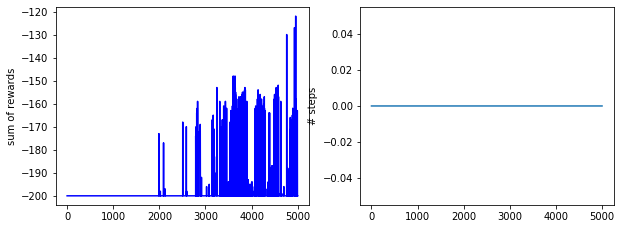

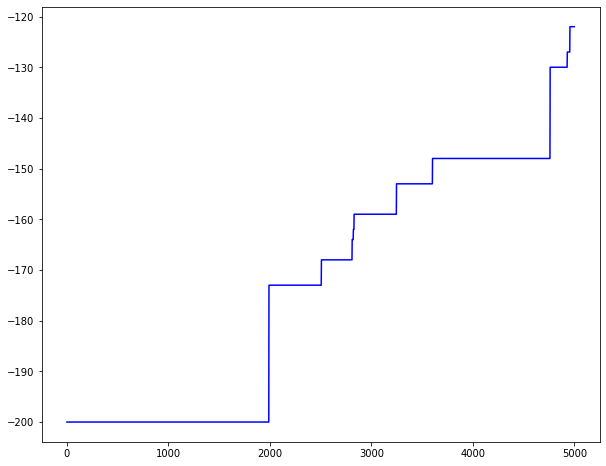

In [55]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(221)
plt.plot(rwds, "b-")

plt.ylabel("sum of rewards")
ax1 = fig.add_subplot(222)
plt.plot(stp)
plt.ylabel("# steps")

plt.plot()
fig1 = plt.figure(figsize=(10,8))
plt.plot(best, "b-")

In [56]:
env

<Monitor<TimeLimit<MountainCarEnv<MountainCar-v0>>>>

In [57]:
class MoutainNN:
    def __init__(self,env,nHiddens):
        self.gamma = 0.50
        self.env = env
        self.nSamples = 1
        self.nHiddens = nHiddens 
        self.nOutputs = 1
        self.nInputs = 3
        self.max_iter = 45
        self.rhoh = self.rhoo = 0.01
        self.rh = self.rhoh / (self.nSamples*self.nOutputs)
        self.ro = self.rhoo / (self.nSamples*self.nOutputs)
       
    def addOnes(self,A):return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)

    def forward(self,X):
        X = self.stdX.standardize(X)
        # Forward pass on training data
        X1 = self.addOnes(X)
        Z = np.tanh(X1 @ self.V)
        Z1 = self.addOnes(Z)
        Y = Z1 @ self.W
        return Y, Z

    def as_array(self,A):
        A = np.array(A)
        if len(A.shape) == 1:
            return A.reshape((1, -1))
        return A

    def backward(self,error, Z, X):

        ### make sure the array shapes
        X = self.as_array(X)
        Z = self.as_array(Z)
        E = self.as_array(error)

        Z1 = self.addOnes(Z)
        X1 = self.addOnes(X)

        # Backward pass - the backpropagation and weight update steps
        dV = self.rh * X1.T @ ( ( E @ self.W[1:,:].T) * (1-Z**2))
        dW = self.ro * Z1.T @ E
        return dV, dW


    def epsilon_greedy(self,e, s):
        if np.random.rand() < e:
            return np.random.choice([0,1,2])
        else:
            Q, _ = self.forward(np.hstack((np.tile(s, (3,1)), np.array([0,1,2]).reshape((-1, 1)))))
            max_as = np.where(Q == np.max(Q))[0] # index to action value
            return np.random.choice(max_as)

    def train(self,epsilon,K,max_steps):
        fig = plt.figure(figsize=(15, 10))
        donestates = []
        final_epsilon = 0.1
        epsilon_decay =  np.exp(np.log(final_epsilon) / K)
        self.V = 0.1*2*(np.random.uniform(size=(self.nInputs+1,self.nHiddens))-0.5)
        self.W = 0.1*2*(np.random.uniform(size=(1+self.nHiddens,self.nOutputs))-0.5)
        self.stdX = Standardizer(np.array([[-1.2,-0.07,0],[0.6, 0.07,2]]))
        
        rtrace = []
        etrace = [epsilon]

        for j in range(K):
            s = self.env.reset()
            a = self.epsilon_greedy(epsilon, s)
            rewards = []
            trace = np.array(s)

            for step in range(max_steps):
                s1,r1,done,info = self.env.step(a)

                a1 = self.epsilon_greedy(epsilon, s1)
                rewards.append(r1)
                trace = np.vstack((trace, s1))
                Q1, _ = self.forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
                Q, Z = self.forward(np.hstack((s, a)))  # output of neural network is Q for next state
                error = r1 + self.gamma * Q1 - Q  # use action value as index by adding one
                dV, dW = self.backward(error, Z, np.hstack((s, a)))
                self.V += dV
                self.W += dW

                s = s1
                a = a1
                if done:
                    break

            epsilon *= epsilon_decay
            etrace.append(epsilon)
            rtrace.append(np.sum(rewards)) 
            plt.clf()
            fig.add_subplot(221)
            plt.plot(rtrace, "b-")
            plt.ylabel("sum of rewards")
            last_plot = (j == K-1)
            fig.add_subplot(222)
            plt.plot(etrace, "-")
            plt.ylabel("p(random action), $\epsilon$")
            ipd.clear_output(wait=True)
            ipd.display(fig)
        return rtrace,etrace

## Testing with different hyperparameters

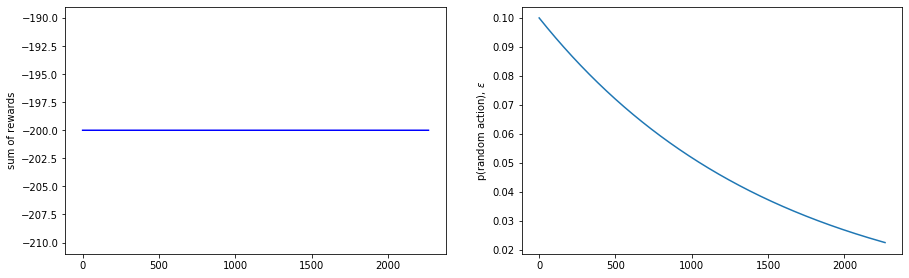

KeyboardInterrupt: 

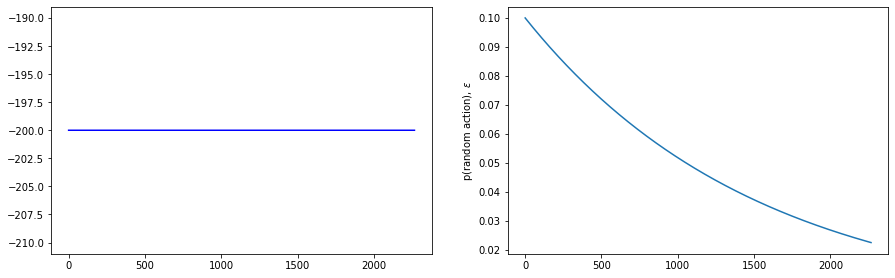

In [58]:
env =  gym.make('MountainCar-v0')
agent = MoutainNN(env,10)
rtrace,etrace = agent.train(0.1,3500,350)

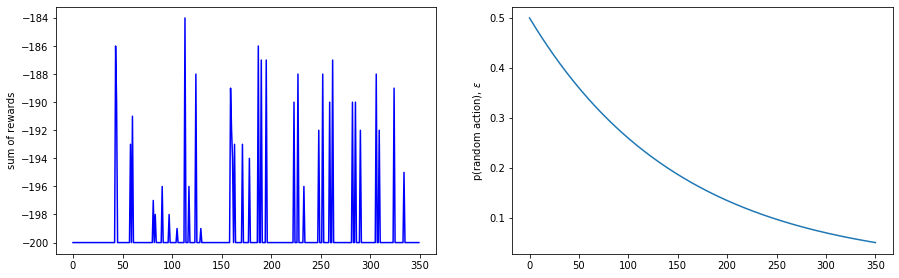

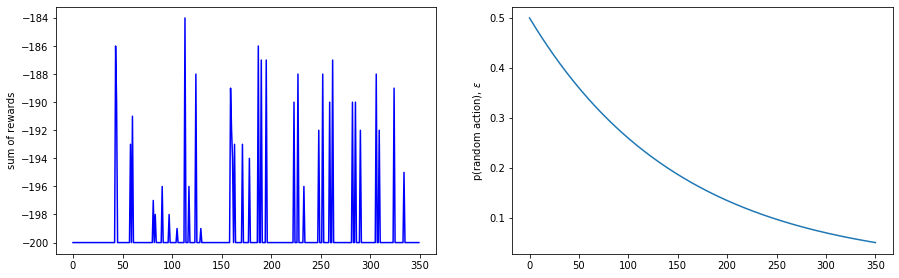

In [59]:
env =  gym.make('MountainCar-v0')
agent = MoutainNN(env,5)
rtrace,etrace = agent.train(0.5,350,500)

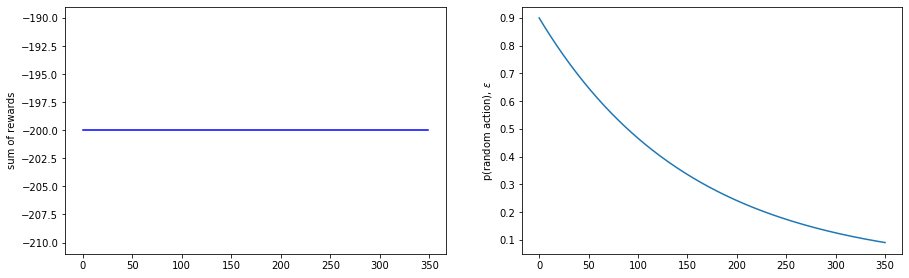

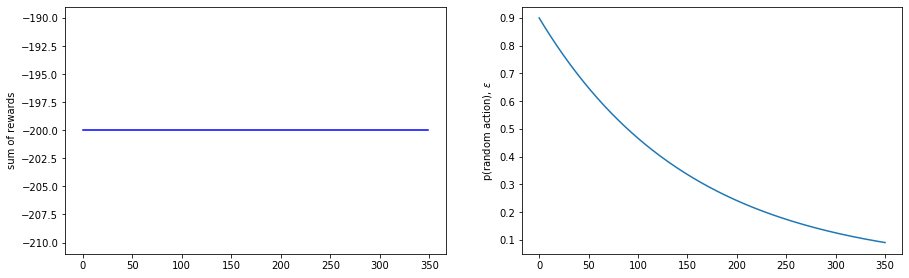

In [60]:
env =  gym.make('MountainCar-v0')
agent = MoutainNN(env,5)
rtrace,etrace = agent.train(0.9,350,500)

In [ ]:
env =  gym.make('MountainCar-v0')
agent = MoutainNN(env,10)
rtrace,etrace = agent.train(0.5,350,500)

<H4> Analysis of the results</H4>

<li> Agent has learnt the model and car has reached  to peak</li>
<li> We build different RL agents by varying their parameters and get the best model obtained to test that further.</li>
<li> We can see that in each of the model the sum of rewards gets close to zero with the higher episodes that signals that the agent has learnt the path to reach the goal effectively.</li>
<li> The number of steps to reach the goal also decreases with the number of episodes as the agent starts exploring the paths in all the models.</li>
<li>We can see that the best model obtained so far has parameter values gamma as 0.5, epsilon as 0.5 , maxiter as 350 and maxstep as 500. With this model, if we notice the sum of rewards we can see that there is a less fall off and the agent has well-learned its path to reach goal when compared to other models.</li>
<li>5 hidden units only seem to work as we if increase it to 8 or 10, agent is not able to produce rewards.</li>
<li> We can also see that the number of steps to reach goal in each episode is less when comapared to other models.</li>
<li>In the test, we can see that though the agent could reach the goal from many start states there are states like [1,8] where the agent has not explored way to reach its goal. This can be overcome to some extent if we could use different start states in each episode so as to increase the level of exploration of states.</li>
<li>By using the best model,  we can observe that the agent has effectively learnt a simple path to reach the goal in minimal steps with maximised rewards.</li>

# III. Methods

- Decide your TD learning approach: SARSA or Q-learning? 
- Describe your neural network function approximator (how many hidden unites? why?).
- Describe your approach and the reason why you select it.
- Explain your codes.

# IV - Results

- Describe the choice of your hyper-parameters for $\gamma$, $\epsilon$, the learning rates $\rho$'s, and the number of hiddend units (or other NN hyper-parameters). 
  - Run experiments to find good hyper-parameters
  - Show the experimental outputs to show the process of your selection
- Visualize the results and explain outputs 
  - Run the codes and tell me what you observe
  - Add more visualizations to enrich your explanation.

# V. Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

<li> This exercise helped me to experiment and understand Q-Learning and SARSA.</li>
<li>The 2d marble and the mountain problems provided me an idea of what an RLagent is and how it can solve some interesting problems.</li>
<li>The introduction to openAI gym was a good start to learn and approach any reinforcement learning problem.</li>
<li>The impact of various parameters like gamma, epsilon and alpha on the developed model can be well understood with the experimentations.</li>
<li>It is indeed a very good exercise that provides me a guidance to solve any reinforcement learning problem.</li>

# Extra Credit

You will be qualified to earn an extra credit when you solve both problems with complete experimental results and discussions, following the bullets in results section for both. 



## Grading

For this assignment, the grading rubric is a bit different. Please check it carefully. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
25 | Problems | 
 |10| 2D Marble Class
 | 5| Explanation of problem and class implementation
 | 5| Explanation of mountain car problem
 | 5| explanation of the codes to use MountainCarContinuous-v0 from OpenAI Gym
25 | Methods | 
 |10| RLAgent1 for the first problem
 | 5| Explanation of the RLAgent1
 | 5| RLAgent2 for the first problem
 | 5| Explanation of the RLAgent2
40 | Results 
 | 5| Reports the selected parameters 
 |10| Experimental outputs that show the choice of parameters. How do you choose them?
 | 5| Visualization of learning and learned agent
 |10| Observations and analysis of learning results and plots
 |10| Results analysis (following the above four rubric criteria) for the second problem
5 | Conclusions 
